### DSC550##### 
Week111 assigment, Author: Xin Tang,53243/2024

In [2]:
# lOAD THE DATASET
# SET the environment to python 3.9 in order to install keras and tensorflow
from keras.datasets import mnist

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import numpy as np

In [3]:
# Set that the color channel value will be first
K.set_image_data_format("channels_first")

# Set seed
np.random.seed(0)

# Set image information
channels = 1
height = 28
width = 28

In [4]:
import sklearn

import joblib as jb

In [5]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [6]:
#!pip install matplotlib
import matplotlib.pyplot as plt

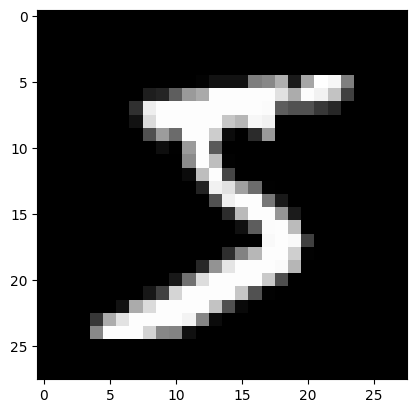

Imgae label is: 5


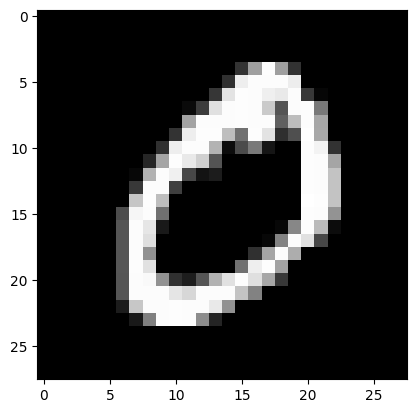

Imgae label is: 0


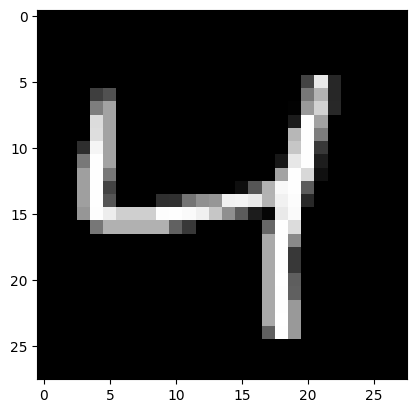

Imgae label is: 4


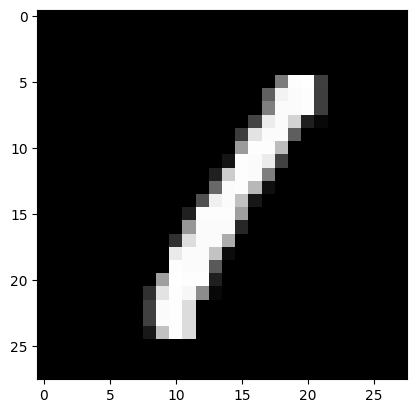

Imgae label is: 1


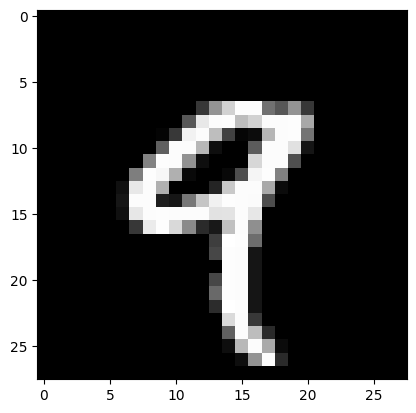

Imgae label is: 9


In [17]:
# display the first 5 image and their labels in training set.
for i in range (0,5):
    image = X_train[i]
    fig = plt.figure
    plt.imshow(image, cmap='gray')
    plt.show()
    print('Imgae label is:', Y_train[i])

In [7]:
# prep data. turn label into categorical values
# Reshape training image data into features
X_train = X_train.reshape(X_train.shape[0], channels, height, width)

# Reshape test image data into features
X_test = X_test.reshape(X_test.shape[0], channels, height, width)

# Rescale pixel intensity to between 0 and 1
X2_train = X_train / 255
X2_test = X_test / 255

# One-hot encode target
Y2_train = np_utils.to_categorical(Y_train)
Y2_test = np_utils.to_categorical(Y_test)
number_of_classes = Y2_test.shape[1]

In [8]:
#Start the neural network
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential

model = Sequential()

# Add convolutional layer with 64 filters, a 5x5 window, and ReLU activation function
model.add(Conv2D(filters=64,
                   kernel_size=(5, 5),
                   input_shape=(channels, width, height),
                   activation='relu'))
                   

# Add max pooling layer with a 2x2 window
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add dropout layer
model.add(Dropout(0.5))

# Add layer to flatten input
model.add(Flatten())

# # Add fully connected layer of 128 units with a ReLU activation function
model.add(Dense(128, activation="relu"))

# Add dropout layer
model.add(Dropout(0.5))

# Add fully connected layer with a softmax activation function
model.add(Dense(number_of_classes, activation="softmax"))

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])

In [10]:
# Train the model
model.fit(X2_train, # Features
          Y2_train, # Target
          epochs=2, # Number of epochs
          verbose=0, # Don't print description after each epoch
          batch_size=1000, # Number of observations per batch
          validation_data=(X2_test, Y2_test)) # Data for evaluation

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 24, 24)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 12, 12)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 12, 12)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

In [28]:
#save the model
#jb.dump(model, "model.pkl")
# model = joblib.load("model.pkl")

In [67]:
# Report the test accuracy of your model.
test_scores = model.evaluate(X_test, Y2_test, verbose=2)
accuracy_cnn =  test_scores[1]*100

print('Test accuracy of this CNN model is:', round(accuracy_cnn,2))

313/313 - 5s - loss: 13.4872 - accuracy: 0.9681 - 5s/epoch - 15ms/step
Test accuracy of this CNN model is: 96.81


In [12]:
#predict using model
Y_pred = model.predict(X2_test)

# convert to label by finding the max value in array
Y_pred_labels = [np.argmax(i) for i in Y_pred]

313/313 [==============================] - 6s 17ms/step


In [13]:
Y_pred_labels[0:2]

[7, 2]

tf.Tensor(
[[ 968    0    0    0    0    0    7    1    4    0]
 [   0 1120    2    2    1    0    5    1    4    0]
 [   5    2  972   11    4    0    4   10   23    1]
 [   0    0    1  981    0    8    0    5   13    2]
 [   1    0    1    0  966    0    5    0    2    7]
 [   2    0    0    2    0  877    4    1    5    1]
 [   6    3    0    0    2    1  942    0    4    0]
 [   1    4   12    2    2    0    0  998    3    6]
 [   5    1    0    4    4    1    3    3  950    3]
 [   5    5    1    1   12    3    1    9   11  961]], shape=(10, 10), dtype=int32)


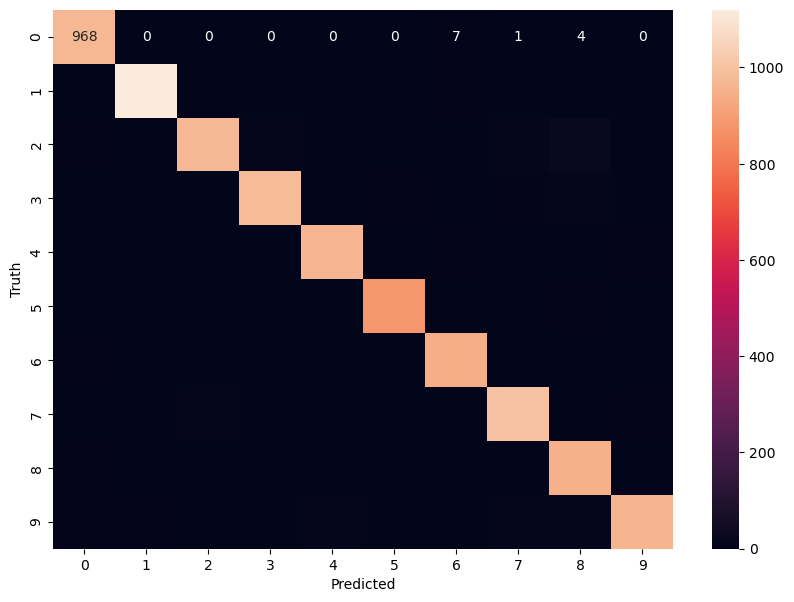

In [22]:
# Display a confusion matrix on the test set classifications
import seaborn as sn
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_pred_labels)

print(cm)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Summarize
1. this model runs quick well with accuracy as 96.8%.
2. it is important to save the model after train. since it is the most time consuming part.
3. model parameter selection is very important. I tried to use some different optimzer and it takes >3 days to train the model. the current rmsprop take 5 mins to finish, so need to further study the paremeter of the model. 